In [14]:
%run Global.ipynb

In [15]:
from sklearn.svm import LinearSVC

# LSVM

In [54]:
train_df = pd.read_csv(RESOURCE_DIR + "train_df.csv", index_col = False, delimiter = ',', header=0)
y = train_df[CLASS_LABEL]
X = pd.read_csv(RESOURCE_DIR + "LSVM_train.csv")  # with feature selection
X

,PublishYear,pagesNumber,Authors_,Authors_aaron mccollough,Authors_abu hamid al ghazali,Authors_agatha christie,Authors_alba de c spedes,Authors_alexander kent,Authors_alexander schmemann,Authors_alexandre dumas,...,choose_adventure,cold_war,life_time,holy_bible,life_death,ultimate_guide,year old,first time,well known,san francisco
0,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.857143,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.928571,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.928571,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,0.857143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,0.857143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,0.928571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
svm = LinearSVC(random_state=30027, C=5, dual=False)
svm.fit(X, y)

LinearSVC(C=5, dual=False, random_state=30027)

## Hyperparameter tuning for C

In [28]:
param_grid = {'C': range(1,10)}
gs_results = tune_hyperparameter(svm, param_grid, X, y, cv=2)
gs_results

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=2; total time=   0.1s
[CV] END ................................................C=2; total time=   0.2s
[CV] END ................................................C=3; total time=   0.2s
[CV] END ................................................C=3; total time=   0.2s
[CV] END ................................................C=4; total time=   0.2s
[CV] END ................................................C=4; total time=   0.2s
[CV] END ................................................C=5; total time=   0.2s
[CV] END ................................................C=5; total time=   0.2s
[CV] END ................................................C=6; total time=   0.2s
[CV] END ........................................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'C': 1},0.721530,0.011407,9,0.163199,0.005286,9,0.266179,0.007809,9,...,1,0.165492,0.002185,9,0.258874,0.000501,9,0.731735,0.001963,8
1,{'C': 2},0.722507,0.009741,8,0.164393,0.004434,8,0.267836,0.006554,8,...,4,0.168524,0.007234,8,0.260858,0.008492,8,0.731691,0.001226,9
2,{'C': 3},0.723120,0.009918,7,0.164905,0.004604,4,0.268556,0.006790,6,...,2,0.171550,0.006228,7,0.264733,0.006872,7,0.731908,0.001356,7
3,{'C': 4},0.726519,0.006519,3,0.164563,0.004945,7,0.268326,0.007020,7,...,3,0.173568,0.006230,1,0.267025,0.007244,1,0.732168,0.001096,3
4,{'C': 5},0.726912,0.006912,1,0.164905,0.005286,5,0.268804,0.007497,4,...,5,0.173568,0.006230,1,0.266822,0.007447,2,0.732212,0.001139,1
5,{'C': 6},0.726912,0.006912,1,0.164905,0.005286,5,0.268804,0.007497,4,...,5,0.173568,0.006230,1,0.266822,0.007447,2,0.732212,0.001139,1
6,{'C': 7},0.725359,0.008464,6,0.165416,0.004775,3,0.269385,0.006916,3,...,7,0.173568,0.006230,1,0.266207,0.007640,4,0.732082,0.001182,5
7,{'C': 8},0.725574,0.008249,4,0.165587,0.004604,1,0.269627,0.006674,1,...,7,0.173568,0.006230,1,0.266207,0.007640,4,0.732125,0.001139,4
8,{'C': 9},0.725574,0.008249,4,0.165587,0.004604,1,0.269627,0.006674,1,...,9,0.173568,0.006230,1,0.265805,0.008041,6,0.732038,0.001052,6


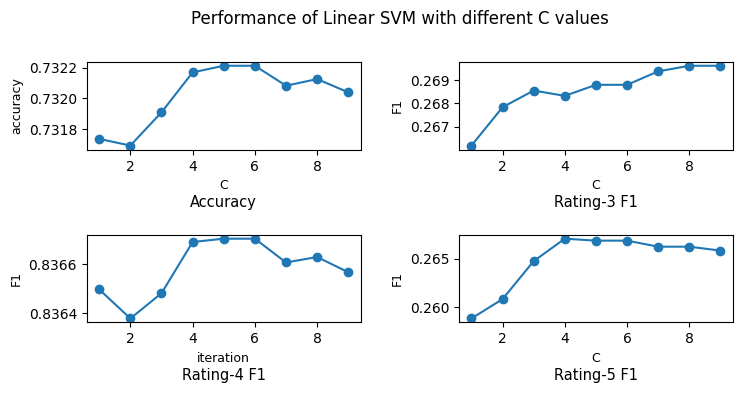

In [34]:
# Visualise results
f1_3 = gs_results['mean_test_3.0_f1-score']
f1_4 = gs_results['mean_test_4.0_f1-score']
f1_5 = gs_results['mean_test_5.0_f1-score']
acc = gs_results['mean_test_accuracy']
C = [cell['C'] for cell in gs_results['params'].tolist()]  # extract the C values

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(8, 4))
fig.tight_layout(pad=4)

fig.suptitle('Performance of Linear SVM with different C values')
fig.subplots_adjust(top=0.85)

ax1.set_title('Accuracy', y=-0.75, fontsize=10.5)
ax1.plot(C, acc, '-o')
ax1.set_xlabel('C', fontsize=9)
ax1.set_ylabel('accuracy', fontsize=9)

ax2.set_title('Rating-3 F1', y=-0.75, fontsize=10.5)
ax2.plot(C, f1_3, '-o')
ax2.set_xlabel('C', fontsize=9)
ax2.set_ylabel('F1', fontsize=9)

ax3.set_title('Rating-4 F1', y=-0.75, fontsize=10.5)
ax3.plot(C, f1_4, '-o')
ax3.set_xlabel('iteration', fontsize=9)
ax3.set_ylabel('F1', fontsize=9)

ax4.set_title('Rating-5 F1', y=-0.75, fontsize=10.5)
ax4.plot(C, f1_5, '-o')
ax4.set_xlabel('C', fontsize=9)
ax4.set_ylabel('F1', fontsize=9)

plt.savefig('LSVM_GridSearchHT.png')
plt.show()

## RFECV results

Note: Here's the sample code for one iteration of RFECV. It takes way too long, so we only include the code for the visualisation.

In [92]:
from sklearn.feature_selection import RFECV

# One iteration of RFECV
selector = RFECV(svm, step=1, cv=3)
selector = selector.fit(X, y)

# Get the selected features
filtered_features = [X.columns[i] for i in range(X.shape[1]) if selector.support_[i]]
X_filtered1 = X[filtered_features]
filtered_features

['PublishYear',
 'pagesNumber',
 'Authors_',
 'Authors_aaron mccollough',
 'Authors_abu hamid al ghazali',
 'Authors_agatha christie',
 'Authors_alba de c spedes',
 'Authors_alexander kent',
 'Authors_alexander schmemann',
 'Authors_alexandre dumas',
 'Authors_alison inches',
 'Authors_allan fowler',
 'Authors_amy knight',
 'Authors_andrew o hagan',
 'Authors_ann arensberg',
 'Authors_ann radcliffe',
 'Authors_ann ripley',
 'Authors_ann waldron',
 'Authors_annette broadrick',
 'Authors_anonymous',
 'Authors_arthur herzog iii',
 'Authors_arthur r jensen',
 'Authors_barbara barbieri mcgrath',
 'Authors_barbara kuhn timby',
 'Authors_beth moore',
 'Authors_beverly brandt',
 'Authors_bill ashcroft',
 'Authors_bill watterson',
 'Authors_bill willingham',
 'Authors_bradley jersak',
 'Authors_brenda jackson',
 'Authors_bronwyn jameson',
 'Authors_c g jung',
 'Authors_camille laurens',
 'Authors_carol grace',
 'Authors_carole mortimer',
 'Authors_catherine cookson',
 'Authors_catherine jinks',

In [89]:
rfecv_results = pd.read_csv(RESOURCE_DIR + "LSVM_RFECV_results.csv", index_col=False)
rfecv_results['mean_score'] = rfecv_results.iloc[:,1:].mean(axis=1)
rfecv_results

,iteration,accuracy,f1_3,f1_4,f1_5,mean_score
0,1,0.734857,0.281971,0.837924,0.287260,0.535503
1,2,0.734640,0.282971,0.837754,0.287776,0.535785
2,3,0.734900,0.281874,0.837939,0.294384,0.537274
3,4,0.734987,0.281293,0.838019,0.296142,0.537610
4,5,0.734163,0.273049,0.837750,0.291847,0.534202
5,6,0.737155,0.250038,0.840810,0.297449,0.531363
6,7,0.737328,0.242451,0.841143,0.300944,0.530466
7,8,0.738022,0.242451,0.841631,0.304646,0.531687
8,9,0.737632,0.232129,0.841693,0.307594,0.529762


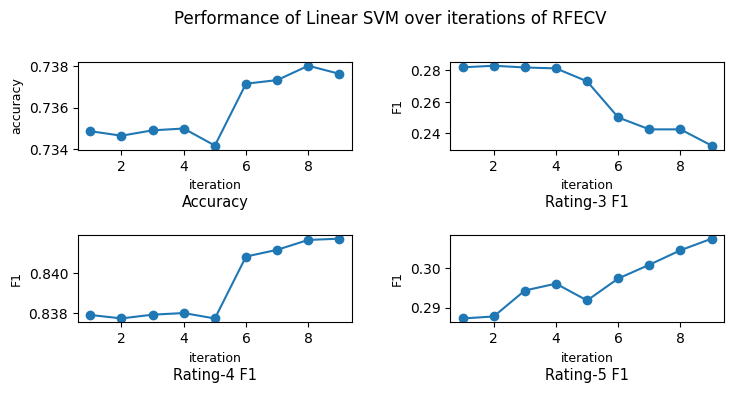

In [90]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(8, 4))
fig.tight_layout(pad=4)

fig.suptitle('Performance of Linear SVM over iterations of RFECV')
fig.subplots_adjust(top=0.85)

ax1.set_title('Accuracy', y=-0.75, fontsize=10.5)
ax1.plot(rfecv_results['iteration'], rfecv_results['accuracy'], '-o')
ax1.set_xlabel('iteration', fontsize=9)
ax1.set_ylabel('accuracy', fontsize=9)

ax2.set_title('Rating-3 F1', y=-0.75, fontsize=10.5)
ax2.plot(rfecv_results['iteration'], rfecv_results['f1_3'], '-o')
ax2.set_xlabel('iteration', fontsize=9)
ax2.set_ylabel('F1', fontsize=9)

ax3.set_title('Rating-4 F1', y=-0.75, fontsize=10.5)
ax3.plot(rfecv_results['iteration'], rfecv_results['f1_4'], '-o')
ax3.set_xlabel('iteration', fontsize=9)
ax3.set_ylabel('F1', fontsize=9)

ax4.set_title('Rating-5 F1', y=-0.75, fontsize=10.5)
ax4.plot(rfecv_results['iteration'], rfecv_results['f1_5'], '-o')
ax4.set_xlabel('iteration', fontsize=9)
ax4.set_ylabel('F1', fontsize=9)

plt.savefig('LSVM_RFECV.png')
plt.show()

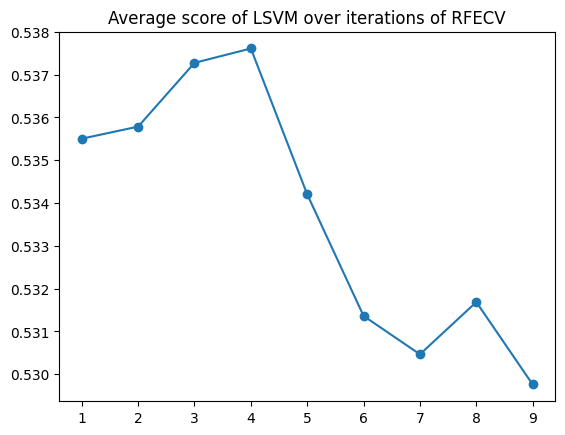

In [91]:
# Also plot the average score
plt.plot(rfecv_results['iteration'], rfecv_results['mean_score'], '-o')
plt.title('Average score of LSVM over iterations of RFECV')
plt.savefig('LSVM_RFECV_mean.png')
plt.show()

## Comparing multi-class strategies

LinearSVC prediction took 3.1835429668426514 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.745098    0.194208      0.308108       0.739357    0.964220   
1       0.718954    0.187394      0.297297       0.739953    0.965453   
2       0.756757    0.191126      0.305177       0.739090    0.971622   
3       0.744526    0.174061      0.282158       0.737928    0.971006   
4       0.805556    0.197952      0.317808       0.741088    0.974707   
5       0.701389    0.172355      0.276712       0.738208    0.965453   
6       0.750000    0.163823      0.268908       0.735198    0.972856   
7       0.743056    0.182594      0.293151       0.740132    0.971622   
8       0.769231    0.187394      0.301370       0.737459    0.970988   
9       0.742647    0.172061      0.279391       0.737612    0.964815   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836948       0.450000    0.181818      0.258993  0.734720  
1  

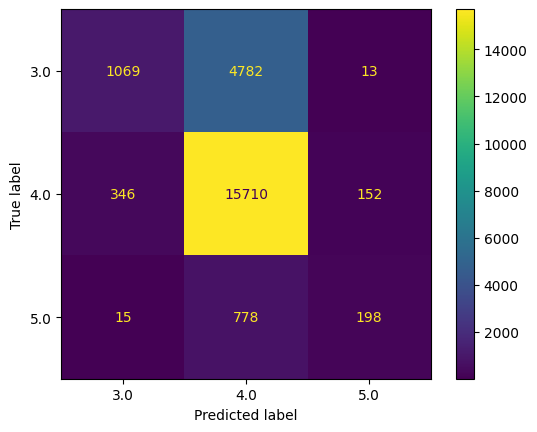

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.747721  0.027755
 3.0_recall     0.182297  0.011204
 3.0_f1-score   0.293008  0.015737
 4.0_precision  0.738602  0.001688
 4.0_recall     0.969274  0.003858
 4.0_f1-score   0.838357  0.001807
 5.0_precision  0.546240  0.071998
 5.0_recall     0.199869  0.043038
 5.0_f1-score   0.290971  0.052933
 accuracy       0.736114  0.002864)

In [38]:
# One-vs-rest
svm_ovr = LinearSVC(random_state=30027, C=5, dual=False, multi_class='ovr')
cross_val_report(svm_ovr, X, y)

LinearSVC prediction took 6.4624879360198975 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.751678    0.190801      0.304348       0.738454    0.966687   
1       0.730496    0.175468      0.282967       0.737459    0.970389   
2       0.746269    0.170648      0.277778       0.735170    0.971006   
3       0.709924    0.158703      0.259414       0.733302    0.968538   
4       0.787879    0.177474      0.289694       0.737407    0.975324   
5       0.723077    0.160410      0.262570       0.736670    0.971622   
6       0.724138    0.143345      0.239316       0.732499    0.974707   
7       0.763359    0.170648      0.278940       0.737751    0.975324   
8       0.789062    0.172061      0.282517       0.735568    0.975309   
9       0.743590    0.148211      0.247159       0.733084    0.969753   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837296       0.444444    0.161616      0.237037  0.734720  
1  

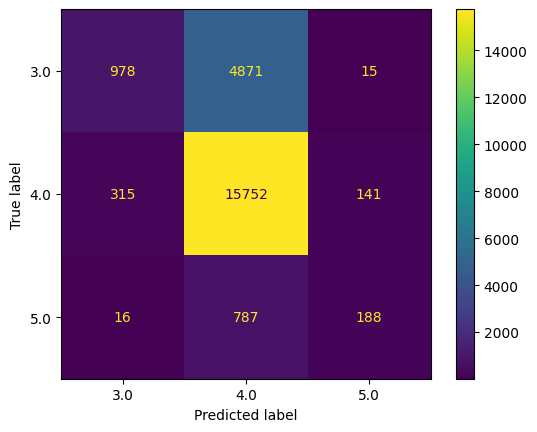

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.746947  0.026841
 3.0_recall     0.166777  0.014238
 3.0_f1-score   0.272470  0.020006
 4.0_precision  0.735736  0.002157
 4.0_recall     0.971866  0.003148
 4.0_f1-score   0.837471  0.001827
 5.0_precision  0.548350  0.077640
 5.0_recall     0.189747  0.033461
 5.0_f1-score   0.281104  0.044309
 accuracy       0.733556  0.003368)

In [39]:
# Crammer Singer
svm_cr = LinearSVC(random_state=30027, C=5, dual=False, multi_class='crammer_singer')
cross_val_report(svm_cr, X, y)

SVC prediction took 472.6346228122711 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.738562    0.192504      0.305405       0.738905    0.965453   
1       0.741007    0.175468      0.283747       0.736891    0.971006   
2       0.729927    0.170648      0.276625       0.735418    0.972239   
3       0.698529    0.162116      0.263158       0.734207    0.967921   
4       0.777778    0.179181      0.291262       0.737284    0.974707   
5       0.723077    0.160410      0.262570       0.736547    0.971006   
6       0.724138    0.143345      0.239316       0.731820    0.974707   
7       0.746269    0.170648      0.277778       0.737628    0.974707   
8       0.781250    0.170358      0.279720       0.735102    0.974691   
9       0.743590    0.148211      0.247159       0.733084    0.969753   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837122       0.472222    0.171717      0.251852  0.734720  
1      0.8

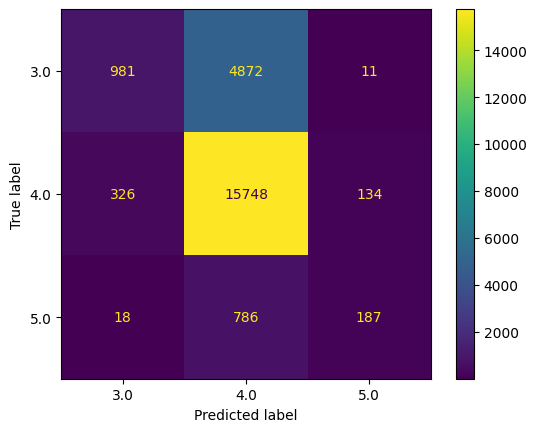

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.740413  0.024814
 3.0_recall     0.167289  0.014482
 3.0_f1-score   0.272674  0.019964
 4.0_precision  0.735689  0.002191
 4.0_recall     0.971619  0.003238
 4.0_f1-score   0.837348  0.001652
 5.0_precision  0.566582  0.069171
 5.0_recall     0.188747  0.032892
 5.0_f1-score   0.281870  0.041176
 accuracy       0.733469  0.003175)

In [40]:
# Linear kernel SVM, using one-vs-one
from sklearn.svm import SVC

svm_ovo = SVC(kernel='linear', random_state=30027, C=5, decision_function_shape='ovo')
cross_val_report(svm_ovo, X, y)

## Data Visualisation using PCA

In [62]:
train_df_full = pd.read_csv(RESOURCE_DIR + "train_df_full.csv", index_col = False, delimiter = ',', header=0)
X_full = train_df_full.iloc[:,:-1]  # dataset with no features dropped

In [63]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [64]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_full.values)
df = train_df.copy()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15075489 0.11061828 0.09269644]


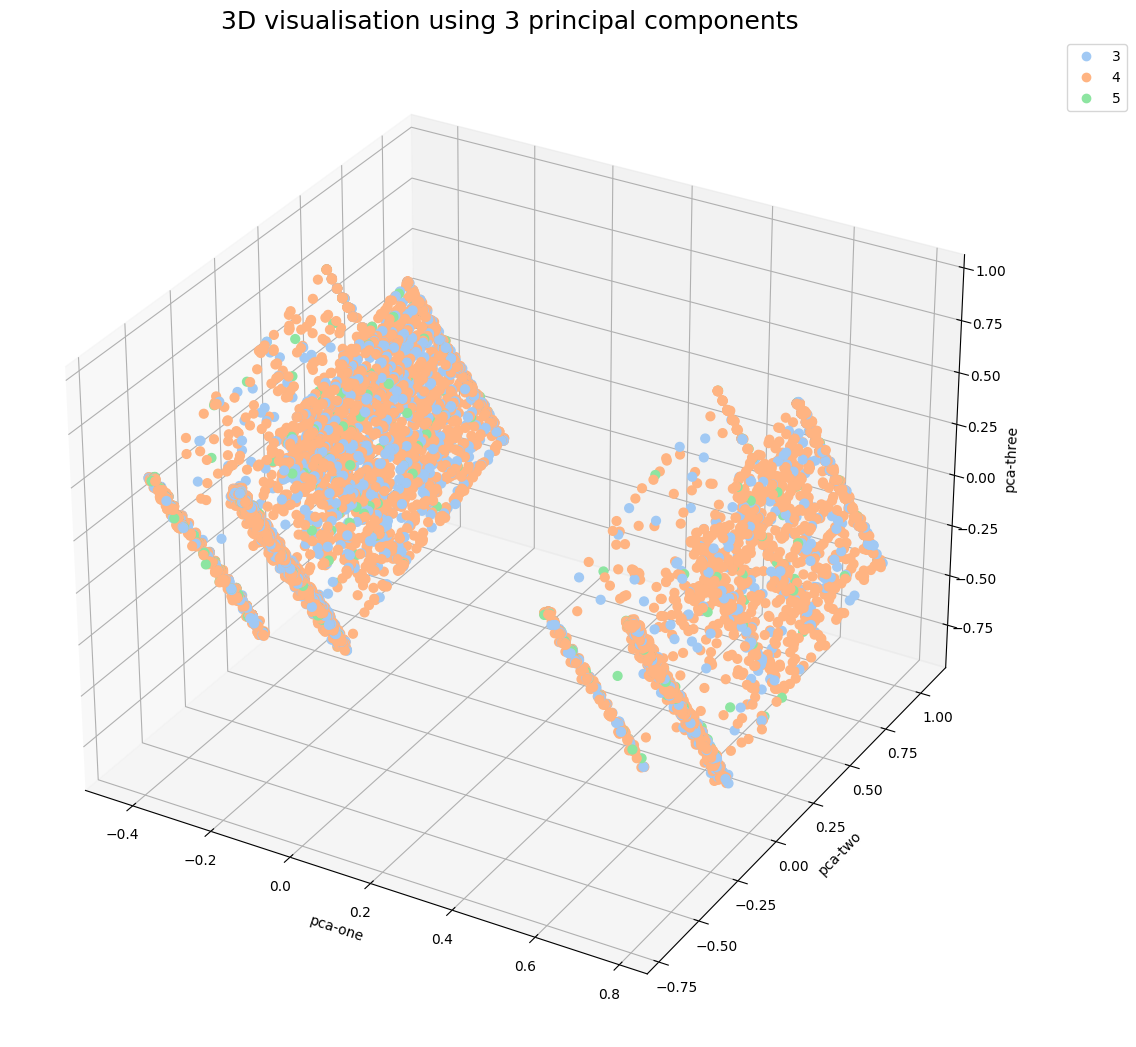

In [65]:
rndperm = np.random.permutation(df.shape[0])
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("pastel", 3).as_hex())

sc = ax.scatter(
    df.loc[rndperm,:]["pca-one"],
    df.loc[rndperm,:]["pca-two"],
    df.loc[rndperm,:]["pca-three"],
    s=40,
    c=df.loc[rndperm,:]["rating_label"],
    cmap=cmap,
    alpha=1
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.title('3D visualisation using 3 principal components', fontsize=18)
plt.savefig('PCA.png')
plt.show()